
2) Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [102]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv('/Users/nihadnazar/Desktop/ASSIGNMENTS/DATASETS/Salary_Data.csv')
print(df)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


DATA UNDERSTANDING

• Initial analysis

In [104]:
df.shape

(30, 2)

In [105]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [107]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [108]:
#RENAMING THE COLUMNS
df = df.rename(columns = {'YearsExperience' : 'YEARS_EXPERIENCE'})
df = df.rename(columns = {'Salary' : 'SALARY'})
df

,YEARS_EXPERIENCE,SALARY
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


• ASSUMPTION CHECK

1. LINEARITY CHECK

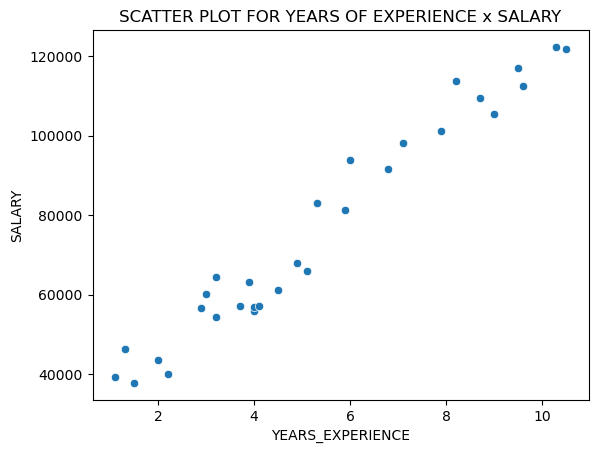

In [109]:
sns.scatterplot(x = 'YEARS_EXPERIENCE',y = 'SALARY',data = df)
plt.title('SCATTER PLOT FOR YEARS OF EXPERIENCE x SALARY')
plt.show()

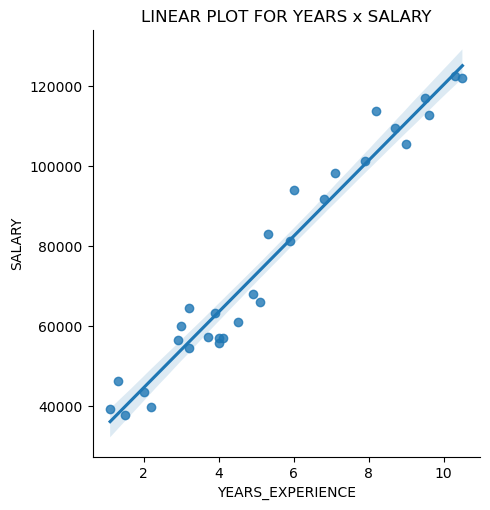

In [110]:
sns.lmplot(x = 'YEARS_EXPERIENCE',y = 'SALARY',data=df)
plt.title('LINEAR PLOT FOR YEARS x SALARY')
plt.show()

2. NORMALITY TEST

/var/folders/8s/_rqw5h_j02n6kdq9xprv4k9r0000gn/T/ipykernel_1921/2024230417.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['YEARS_EXPERIENCE'])


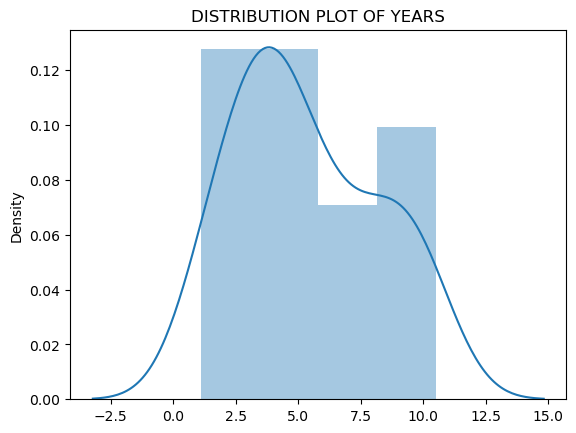

In [111]:
sns.distplot(x = df['YEARS_EXPERIENCE'])
plt.title('DISTRIBUTION PLOT OF YEARS')
plt.show()

In [112]:
df['YEARS_EXPERIENCE'].skew()

0.37956024064804106

HERE THE SKEWNESS IS MORE THAN 0.05, WE CAN'T ACCEPT,
NORMALITY TEST IS FAILED.

3. MULTICOLINEARITY

In [113]:
df.corr()

,YEARS_EXPERIENCE,SALARY
YEARS_EXPERIENCE,1.000000,0.978242
SALARY,0.978242,1.000000


4. AUTO REGRESSION CHECK

(SINCE THERE IS NO TIME BASED INPUT, THERE IS NO NEED OF AUTO REGRESSION CHECK.)

5. MODEL BUILDING

In [114]:
model = smf.ols(formula = 'SALARY ~ YEARS_EXPERIENCE',data = df).fit()
model.params

Intercept           25792.200199
YEARS_EXPERIENCE     9449.962321
dtype: float64

In [115]:
print('T VALUE OF THE MODEL IS: \n',model.tvalues,'\n\nP VALUE OF THE MODEL IS: \n',model.pvalues)

T VALUE OF THE MODEL IS: 
 Intercept           11.346940
YEARS_EXPERIENCE    24.950094
dtype: float64 

P VALUE OF THE MODEL IS: 
 Intercept           5.511950e-12
YEARS_EXPERIENCE    1.143068e-20
dtype: float64


In [116]:
print('R SQUARED VALUE: ',model.rsquared,'\nADJACENT R SQUARED VALUE: ',model.rsquared_adj)

R SQUARED VALUE:  0.9569566641435086 
ADJACENT R SQUARED VALUE:  0.9554194021486339


In [117]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        00:46:54   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YEARS_EXPERIENCE  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6. PREDICTION OF NEW DATA SET

In [118]:
new_data = pd.Series([8,11,15])
pred_salary = pd.DataFrame(new_data,columns=['YEARS_EXPERIENCE'])
pred_salary

,YEARS_EXPERIENCE
0,8
1,11
2,15


In [136]:
print('PREDICTED SALARY FOR EACH YEAR OF EXPERIENCES BY THE MODEL IS:\n\n' ,round(model.predict(pred_salary)))

PREDICTED SALARY FOR EACH YEAR OF EXPERIENCES BY THE MODEL IS:

 0    101392.0
1    129742.0
2    167542.0
dtype: float64


7. APPLYING TRANSFORMATION TO THE DATA

In [120]:
data_transform = df.copy()
data_transform.head(11)

,YEARS_EXPERIENCE,SALARY
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [121]:
data_transformed_y = data_transform[['YEARS_EXPERIENCE']]
data_transformed_y

,YEARS_EXPERIENCE
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [122]:
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()
scaled_years_exp = std_scalar.fit_transform(data_transformed_y)
scaled_years_exp

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [123]:
data_transform['STANDARD_YEARS_EXP'] = scaled_years_exp
data_transform['LOG_YEARS_EXP'] = np.log(data_transform['YEARS_EXPERIENCE'])
data_transform['SQRT_YEARS_EXP'] = np.sqrt(data_transform['YEARS_EXPERIENCE'])
data_transform['EXPONENTIAL_YEARS_EXP'] = np.exp(data_transform['YEARS_EXPERIENCE'])
data_transform['CUBERT_YEARS_EXP'] = np.cbrt(data_transform['YEARS_EXPERIENCE'])

data_transform

,YEARS_EXPERIENCE,SALARY,STANDARD_YEARS_EXP,LOG_YEARS_EXP,SQRT_YEARS_EXP,EXPONENTIAL_YEARS_EXP,CUBERT_YEARS_EXP
0,1.1,39343.0,-1.510053,0.095310,1.048809,3.004166,1.032280
1,1.3,46205.0,-1.438373,0.262364,1.140175,3.669297,1.091393
2,1.5,37731.0,-1.366693,0.405465,1.224745,4.481689,1.144714
3,2.0,43525.0,-1.187494,0.693147,1.414214,7.389056,1.259921
4,2.2,39891.0,-1.115814,0.788457,1.483240,9.025013,1.300591
5,2.9,56642.0,-0.864935,1.064711,1.702939,18.174145,1.426043
6,3.0,60150.0,-0.829096,1.098612,1.732051,20.085537,1.442250
7,3.2,54445.0,-0.757416,1.163151,1.788854,24.532530,1.473613
8,3.2,64445.0,-0.757416,1.163151,1.788854,24.532530,1.473613
9,3.7,57189.0,-0.578216,1.308333,1.923538,40.447304,1.546680


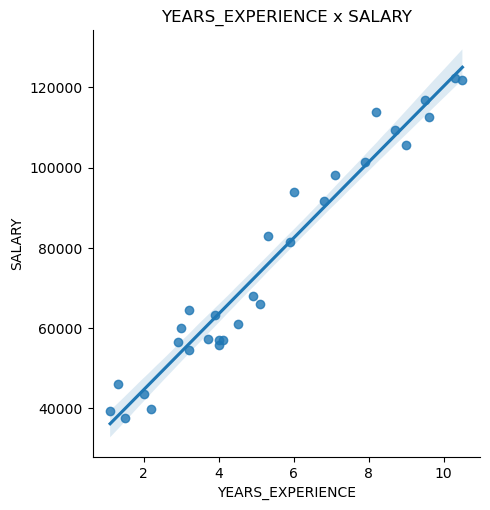

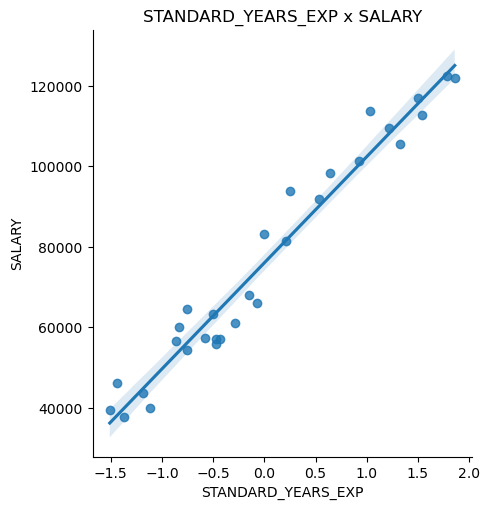

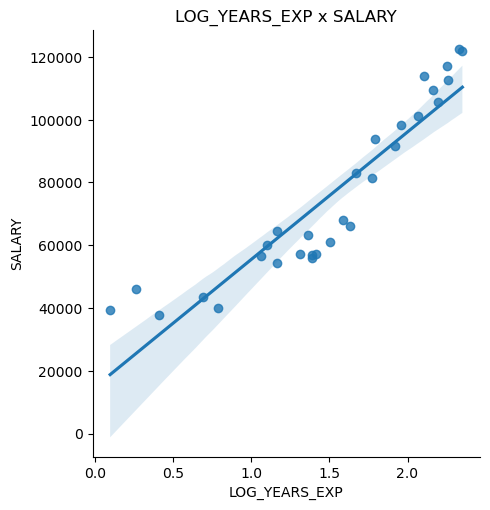

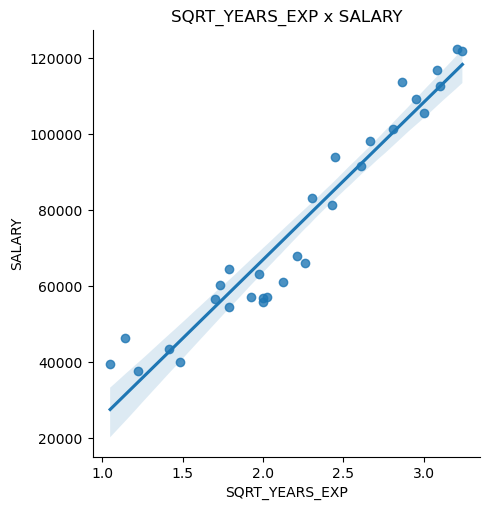

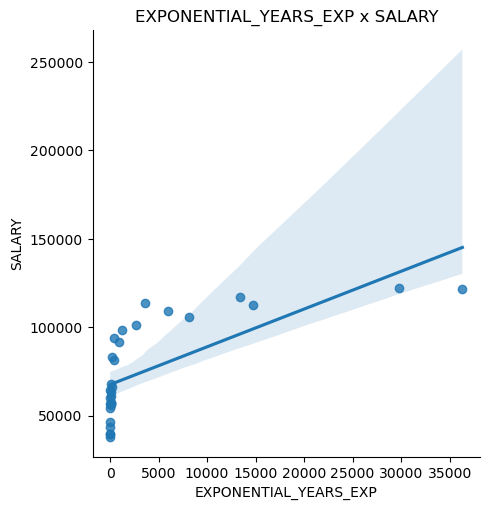

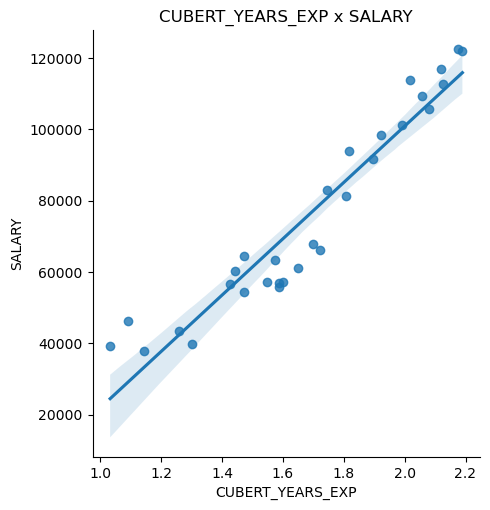

In [124]:
sns.lmplot(x='YEARS_EXPERIENCE',y='SALARY',data = data_transform)
plt.title('YEARS_EXPERIENCE x SALARY')

sns.lmplot(x='STANDARD_YEARS_EXP',y='SALARY',data = data_transform)
plt.title('STANDARD_YEARS_EXP x SALARY')
plt.show()

sns.lmplot(x='LOG_YEARS_EXP',y='SALARY',data = data_transform)
plt.title('LOG_YEARS_EXP x SALARY')
plt.show()

sns.lmplot(x='SQRT_YEARS_EXP',y='SALARY',data = data_transform)
plt.title('SQRT_YEARS_EXP x SALARY')
plt.show()

sns.lmplot(x='EXPONENTIAL_YEARS_EXP',y='SALARY',data = data_transform)
plt.title('EXPONENTIAL_YEARS_EXP x SALARY')
plt.show()

sns.lmplot(x='CUBERT_YEARS_EXP',y='SALARY',data = data_transform)
plt.title('CUBERT_YEARS_EXP x SALARY')
plt.show()

MODEL BUILDING USING STATS MODEL SALARY AND STANDARD YEARS OF EXPERIENCE.

In [125]:
model_1 = smf.ols(formula = 'SALARY ~ STANDARD_YEARS_EXP',data = data_transform).fit()
print('R SQUARED VALUE OF STANDARD_YEARS_EXP: ',round(model_1.rsquared,5))
print('ADJUSTED R SQUARED VALUE OF STANDARD_YEARS_EXP: ',round(model_1.rsquared_adj,5))
print('AKAIKE VALUE OF STANDARD_YEARS_EXP: ',round(model_1.aic,5))
print('BAYESIAN VALUE OF STANDARD_YEARS_EXP: ',round(model_1.bic,5))

R SQUARED VALUE OF STANDARD_YEARS_EXP:  0.95696
ADJUSTED R SQUARED VALUE OF STANDARD_YEARS_EXP:  0.95542
AKAIKE VALUE OF STANDARD_YEARS_EXP:  606.88232
BAYESIAN VALUE OF STANDARD_YEARS_EXP:  609.68471


MODEL BUILDING USING STATS MODEL SALARY AND LOG YEARS OF EXPERIENCE.

In [126]:
model_2 = smf.ols(formula = 'SALARY ~ LOG_YEARS_EXP',data = data_transform).fit()
print('R SQUARED VALUE OF LOG_YEARS_EXP: ',round(model_2.rsquared,5))
print('ADJUSTED R SQUARED VALUE OF LOG_YEARS_EXP: ',round(model_2.rsquared_adj,5))
print('AKAIKE VALUE OF LOG_YEARS_EXP: ',round(model_2.aic,5))
print('BAYESIAN VALUE OF LOG_YEARS_EXP: ',round(model_2.bic,5))

R SQUARED VALUE OF LOG_YEARS_EXP:  0.85389
ADJUSTED R SQUARED VALUE OF LOG_YEARS_EXP:  0.84867
AKAIKE VALUE OF LOG_YEARS_EXP:  643.54712
BAYESIAN VALUE OF LOG_YEARS_EXP:  646.34951


MODEL BUILDING USING STATS MODEL SALARY AND SQUARE ROOT YEARS OF EXPERIENCE.

In [127]:
model_3 = smf.ols(formula = 'SALARY ~ SQRT_YEARS_EXP',data = data_transform).fit()
print('R SQUARED VALUE OF SQRT_YEARS_EXP: ',round(model_3.rsquared,5))
print('ADJUSTED R SQUARED VALUE OF SQRT_YEARS_EXP: ',round(model_3.rsquared_adj,5))
print('AKAIKE VALUE OF SQRT_YEARS_EXP: ',round(model_3.aic,5))
print('BAYESIAN VALUE OF SQRT_YEARS_EXP: ',round(model_3.bic,5))

R SQUARED VALUE OF SQRT_YEARS_EXP:  0.931
ADJUSTED R SQUARED VALUE OF SQRT_YEARS_EXP:  0.92854
AKAIKE VALUE OF SQRT_YEARS_EXP:  621.03887
BAYESIAN VALUE OF SQRT_YEARS_EXP:  623.84127


MODEL BUILDING USING STATS MODEL SALARY AND EXPONENTIAL YEARS OF EXPERIENCE.

In [128]:
model_4 = smf.ols(formula = 'SALARY ~ EXPONENTIAL_YEARS_EXP',data = data_transform).fit()
print('R SQUARED VALUE OF EXPONENTIAL_YEARS_EXP: ',round(model_4.rsquared,5))
print('ADJUSTED R SQUARED VALUE OF EXPONENTIAL_YEARS_EXP: ',round(model_4.rsquared_adj,5))
print('AKAIKE VALUE OF EXPONENTIAL_YEARS_EXP: ',round(model_4.aic,5))
print('BAYESIAN VALUE OF EXPONENTIAL_YEARS_EXP: ',round(model_4.bic,5))

R SQUARED VALUE OF EXPONENTIAL_YEARS_EXP:  0.47238
ADJUSTED R SQUARED VALUE OF EXPONENTIAL_YEARS_EXP:  0.45354
AKAIKE VALUE OF EXPONENTIAL_YEARS_EXP:  682.06713
BAYESIAN VALUE OF EXPONENTIAL_YEARS_EXP:  684.86953


MODEL BUILDING USING STATS MODEL SALARY AND CUBIC ROOT YEARS OF EXPERIENCE.

In [129]:
model_5 = smf.ols(formula = 'SALARY ~ CUBERT_YEARS_EXP',data = data_transform).fit()
print('R SQUARED VALUE OF CUBERT_YEARS_EXP: ',round(model_5.rsquared,5))
print('ADJUSTED R SQUARED VALUE OF CUBERT_YEARS_EXP: ',round(model_5.rsquared_adj,5))
print('AKAIKE VALUE OF CUBERT_YEARS_EXP: ',round(model_5.aic,5))
print('BAYESIAN VALUE OF CUBERT_YEARS_EXP: ',round(model_5.bic,5))

R SQUARED VALUE OF CUBERT_YEARS_EXP:  0.91131
ADJUSTED R SQUARED VALUE OF CUBERT_YEARS_EXP:  0.90814
AKAIKE VALUE OF CUBERT_YEARS_EXP:  628.57055
BAYESIAN VALUE OF CUBERT_YEARS_EXP:  631.37294


HERE WE CONFIRM THAT STANDARD SCALER MODEL IS THE BEST MODEL BECAUSE OF THE FOLLOWING REASONS: 

• BOTH R SQUARED AND ADJUSTED R SQUARED VALUE ARE HIGHER COMPARED TO THE OTHER MODEL VALUES.

• BOTH AIC AND BIC ARE LOWER COMPARED TO THE OTHER MODEL VALUES.

• THEREFORE, WE TAKE THE STANDARD SCALER MODEL FOFR PREDICTION.


In [130]:
new_data_2 = new_data.copy()
new_pred_data = pd.DataFrame(new_data_2,columns=['YEARS_OF_EXPERIENCE'])
new_pred_data

,YEARS_OF_EXPERIENCE
0,8
1,11
2,15


In [132]:
#TRANSFORMING THE NEW DATA WITH THE BEST MODEL
new_pred_data['STANDARD_YEARS_EXP'] = std_scalar.fit_transform(new_pred_data)
new_pred_data

,YEARS_OF_EXPERIENCE,STANDARD_YEARS_EXP
0,8,-1.162476
1,11,-0.116248
2,15,1.278724


In [135]:
round(model_1.predict(new_pred_data))

0     45352.0
1     72938.0
2    109719.0
dtype: float64

CONCLUSION:

• IN OUR FIRST MODEL WE GOT RS 101392/- APPROX SALARY FOR 8 YEARS OF EXPERIENCE, BUT OUR BEST MODEL PREDICTED APPROXIMATELY RS 45352/- .

• IN OUR FIRST MODEL WE GOT RS 129742/- APPROX FOR 11 YEARS OF EXPERIENCE, BUT OUR BEST MODEL PREDICTED APPROXIMATELY RS 72938/- .

• IN OUR FIRST MODEL WE GOT RS 167542/- APPROX FOR 15 YEARS OF EXPERIENCE, BUT OUR BEST MODEL PREDICTED APPROXIMATELY RS 109719/- .